<a href="https://colab.research.google.com/github/jcotass1/2022_Intro_Python/blob/main/Exercises/W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Analyzing Ocean Floats Data using Numpy and Matplotlib

**Learning Goals**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

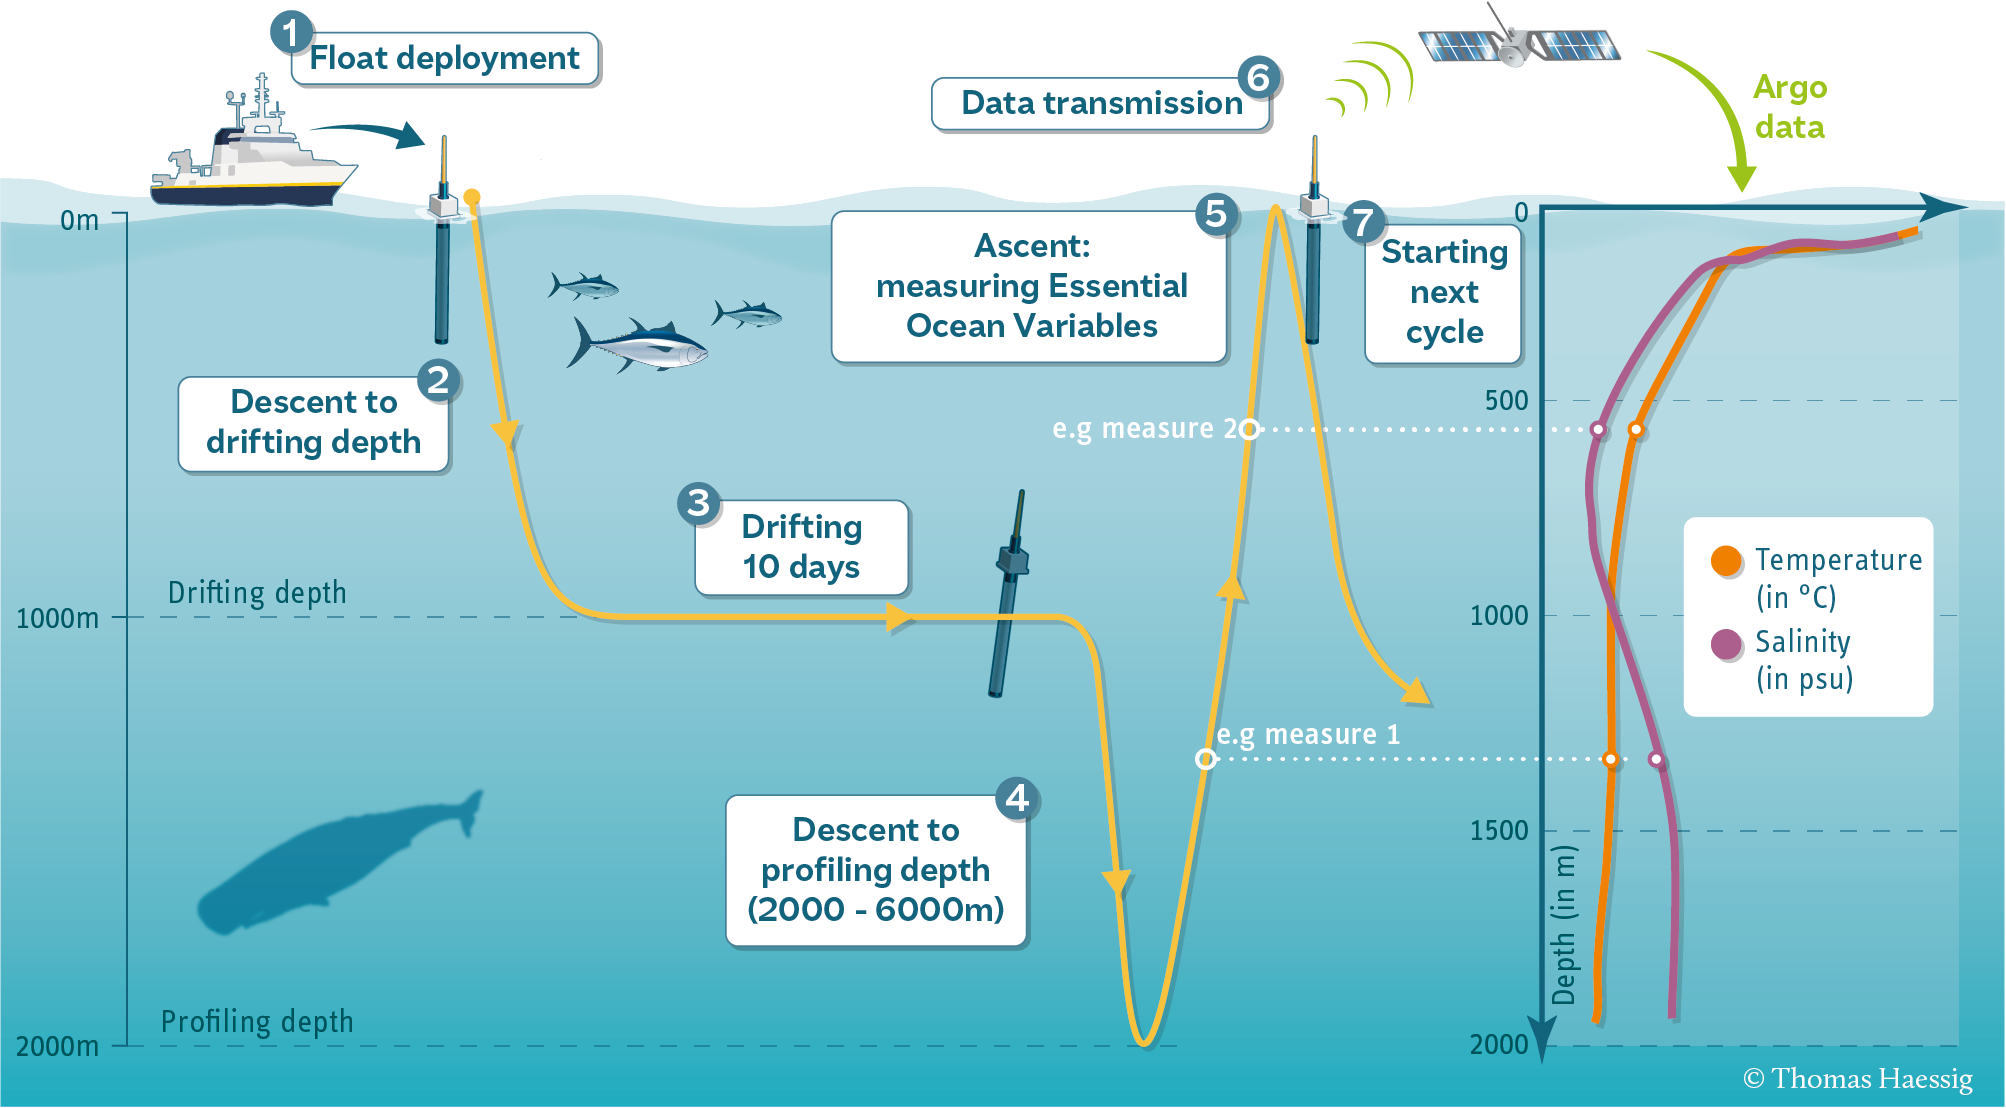


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [1]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy']

In [2]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [3]:
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy']

Then, load the files as `numpy` arrays, for instance using list comprehension

In [4]:
date,S,lon,P,level,T,lat = [np.load(files[i]) for i in range(len(files))]

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [5]:
level

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

Recreate the `level` array using `np.arange` and call it `level_arange`

In [12]:
level_arange = np.arange(0,78)
level_arange

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [13]:
np.testing.assert_equal(level,level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [14]:
level_linspace = np.linspace(0,77,78)
level_linspace

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.])

Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [15]:
np.testing.assert_equal(level,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [17]:
T.shape 
S.shape
P.shape

(78, 75)

In [20]:
lon.shape

(75,)

In [22]:
lat.shape

(75,)

In [23]:
date.shape

(75,)

In [24]:
level.shape

(78,)

Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources: 

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [25]:
a = 7.718e-1 
b = -8.44e-2 
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure. 

In [26]:
!pip install gsw
from gsw import CT_from_t

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 5.2 MB/s 


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [28]:
C_T = CT_from_t(S,T,P)

Calculate the `relative density` using the equation above

In [30]:
rel_d = a*S+b*C_T+c*C_T**2

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and 
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [31]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions. 

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

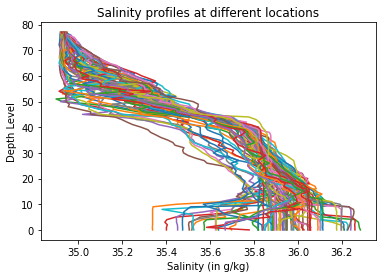

Text(0.5, 1.0, 'Salinity profiles at different locations')

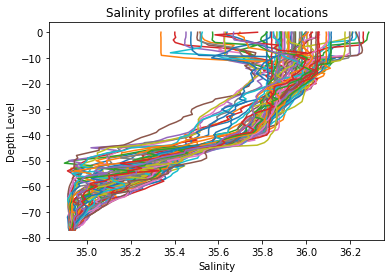

In [32]:
plt.plot(S,-level); # The semi-colon prevents printing the line objects
plt.xlabel('Salinity') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Salinity profiles at different locations')

Make more plots below:

Text(0.5, 1.0, 'Temperature at different locations')

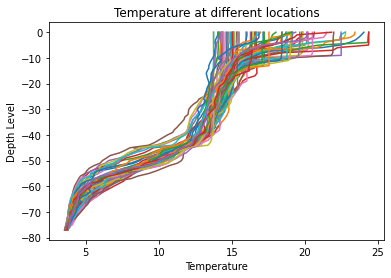

In [33]:
plt.plot(T,-level); # The semi-colon prevents printing the line objects
plt.xlabel('Temperature') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Temperature at different locations')

Text(0.5, 1.0, 'Pressure profiles at different locations')

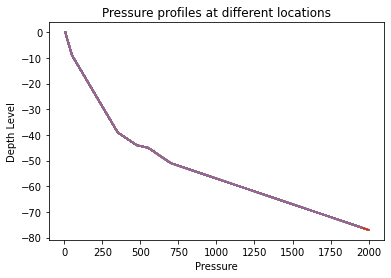

In [36]:
plt.plot(P,-level); # The semi-colon prevents printing the line objects
plt.xlabel('Pressure') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Pressure profiles at different locations')

Text(0.5, 1.0, 'Relative density profiles at different locations')

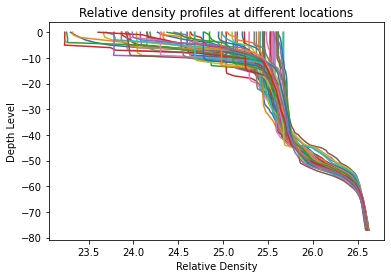

In [37]:
plt.plot(rel_d,-level); # The semi-colon prevents printing the line objects
plt.xlabel('Relative Density') # Takes a string as argument
plt.ylabel('Depth Level')
plt.title('Relative density profiles at different locations')

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html). 

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [39]:
T_mean = np.mean(T,axis=1)
T_mean

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 10.80430666, 10.49702667, 10.1749066 ,  9.83453334,
        9.48625332,  9.19793334,  8.66010666,  8.12324001,  7.60221333,
        7.15289333,  6.74250667,  6.39543999,  6.04598667,  5.74538665,
        5.48913333,  5.26604001,  5.08768   ,  4.93479998,  4.77769334,
        4.65368   ,  4.54237334,  4.44274664,  4.35933333,      

In [40]:
S_mean = np.mean(S,axis=1)
P_mean = np.mean(P,axis=1)
rel_d_mean = np.mean(rel_d,axis=1)

... and the standard deviations.

In [44]:
T_std = np.std(T,axis=1)
S_std = np.std(S,axis=1)
P_std = np.std(P,axis=1)
rel_d_std = np.std(rel_d,axis=1)

Check that they have the same shape as your vertical level `lev` coordinate:

In [48]:
np.testing.assert_equal(P_mean.shape,level.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

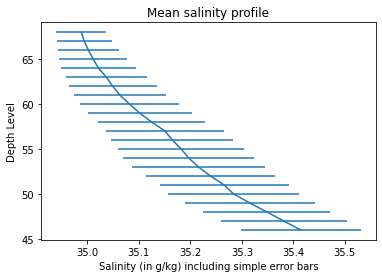

Text(0.5, 1.0, 'Mean temperature profile')

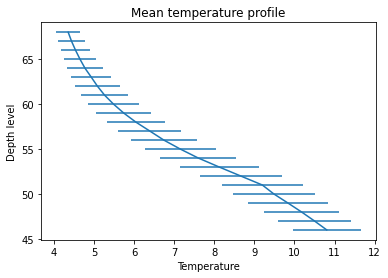

In [49]:
plt.errorbar(T_mean,level,xerr=T_std)
plt.xlabel('Temperature')
plt.ylabel('Depth level')
plt.title('Mean temperature profile')

Three more plots and we'll be all set! 🙂

Text(0.5, 1.0, 'Mean salinity profile')

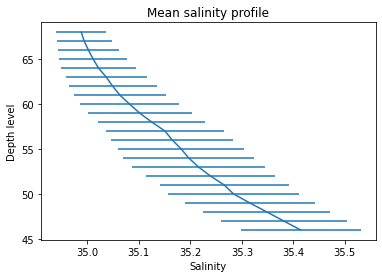

In [50]:
plt.errorbar(S_mean,level,xerr=S_std)
plt.xlabel('Salinity')
plt.ylabel('Depth level')
plt.title('Mean salinity profile')

Text(0.5, 1.0, 'Mean pressure profile')

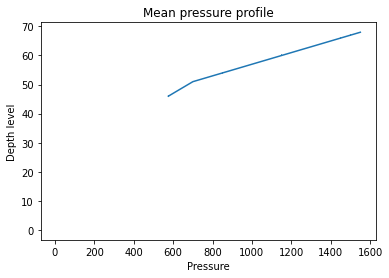

In [51]:
plt.errorbar(P_mean,level,xerr=P_std)
plt.xlabel('Pressure')
plt.ylabel('Depth level')
plt.title('Mean pressure profile')

Text(0.5, 1.0, 'Mean relative density profile')

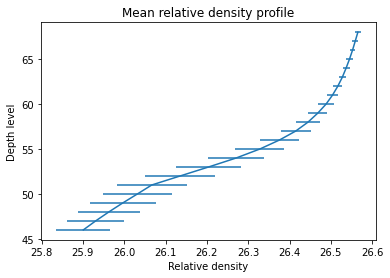

In [52]:
plt.errorbar(rel_d_mean,level,xerr=rel_d_std)
plt.xlabel('Relative density')
plt.ylabel('Depth level')
plt.title('Mean relative density profile')

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [62]:
S_mean_nan=np.nanmean(S,axis=1)
P_mean_nan=np.nanmean(P,axis=1)
T_mean_nan=np.nanmean(T,axis=1)
rel_d_mean_nan=np.nanmean(rel_d,axis=1)
rel_d_mean_nan

array([24.78240233, 24.78821109, 24.80399782, 24.82743035, 24.87624749,
       24.93505192, 25.00370627, 25.08667989, 25.15853103, 25.19442663,
       25.29416932, 25.34780098, 25.39473801, 25.42469762, 25.45551823,
       25.4747458 , 25.49108317, 25.50466497, 25.5174275 , 25.5289992 ,
       25.54075328, 25.54977119, 25.55835993, 25.56885754, 25.57894844,
       25.58796136, 25.5962309 , 25.60320348, 25.6101259 , 25.61740575,
       25.62466277, 25.63150207, 25.63954389, 25.64740666, 25.65510627,
       25.66257397, 25.66976418, 25.67725377, 25.68471148, 25.69229216,
       25.71183333, 25.73002004, 25.74997439, 25.77201241, 25.79419758,
       25.87205588, 25.90086615, 25.93076294, 25.96266297, 25.99633694,
       26.03175294, 26.06651762, 26.13495917, 26.20371829, 26.27052919,
       26.3278476 , 26.37530871, 26.41480354, 26.44470169, 26.46826568,
       26.48821066, 26.50384344, 26.51677094, 26.52768415, 26.53668014,
       26.54491708, 26.55228621, 26.55881519, 26.56519787, 26.57

Similarly, recalculate the standard deviations ignoring the missing values.

In [65]:
S_std_nan=np.nanstd(S,axis=1)
P_std_nan=np.nanstd(P,axis=1)
T_std_nan=np.nanstd(T,axis=1)
rel_d_std_nan=np.nanstd(rel_d,axis=1)
T_std_nan

array([2.92500898, 2.86405591, 2.83324563, 2.75112353, 2.60248422,
       2.42649165, 2.20220589, 1.99752543, 1.79105862, 1.74132795,
       1.26608465, 1.07857596, 0.89761236, 0.79748479, 0.68525328,
       0.6394096 , 0.61835635, 0.59387877, 0.56010736, 0.55009107,
       0.53183794, 0.52634089, 0.52668259, 0.51009182, 0.49376838,
       0.48980214, 0.48551874, 0.48516171, 0.49244536, 0.50557331,
       0.50881718, 0.50482633, 0.50093284, 0.51411271, 0.50962002,
       0.51399949, 0.52544584, 0.53182873, 0.5466501 , 0.55060902,
       0.56066216, 0.57937588, 0.5989958 , 0.63392862, 0.70640057,
       0.85775269, 0.84204226, 0.90031954, 0.94661515, 0.9902255 ,
       1.01786435, 1.01690775, 1.01944275, 0.97987767, 0.94359878,
       0.88207755, 0.82934499, 0.7859263 , 0.71755907, 0.68351183,
       0.64382025, 0.58990336, 0.55077313, 0.50187175, 0.45673872,
       0.4085324 , 0.36748504, 0.33272584, 0.2996815 , 0.25570195,
       0.21802589, 0.17365755, 0.14408683, 0.11509768, 0.09214

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface. 

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

Text(0.5, 1.0, 'Scatter plot latitude-longitude')

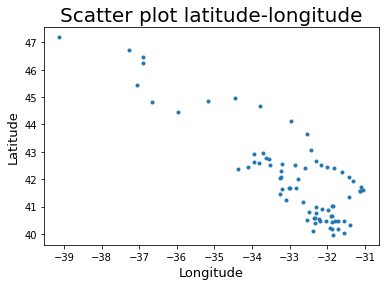

In [77]:
plt.scatter(lon,lat,s=9)
plt.xlabel('Longitude',fontsize=13) 
plt.ylabel('Latitude',fontsize=13)
plt.title('Scatter plot latitude-longitude',fontsize=20) 